# URBAN TRAFFIC EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Read the CSV file with the specified data types
df = pd.read_csv('futuristic_city_traffic.csv')


## DATA PREPARATION AND CLEANING

In [4]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [5]:
len(df.columns)

11

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [7]:
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


In [8]:
# Convert 'Hour Of Day' to category as it represents discrete values
df['Hour Of Day'] = df['Hour Of Day'].astype('category')

# Convert 'Is Peak Hour' and 'Random Event Occurred' to boolean
df['Is Peak Hour'] = df['Is Peak Hour'].astype(bool)
df['Random Event Occurred'] = df['Random Event Occurred'].astype(bool)

# Convert 'City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week' to categorical variables
categorical_columns = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the new data types
print(df.dtypes)


City                     category
Vehicle Type             category
Weather                  category
Economic Condition       category
Day Of Week              category
Hour Of Day              category
Speed                     float64
Is Peak Hour                 bool
Random Event Occurred        bool
Energy Consumption        float64
Traffic Density           float64
dtype: object


In [8]:
df.isna().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [9]:
cities=df.City.unique()
len(cities)
cities[:6]

['SolarisVille', 'AquaCity', 'Neuroburg', 'Ecoopolis', 'TechHaven', 'MetropolisX']
Categories (6, object): ['AquaCity', 'Ecoopolis', 'MetropolisX', 'Neuroburg', 'SolarisVille', 'TechHaven']

## EXPLORATORY DATA ANALYSIS

## Energy Consumption Analysis

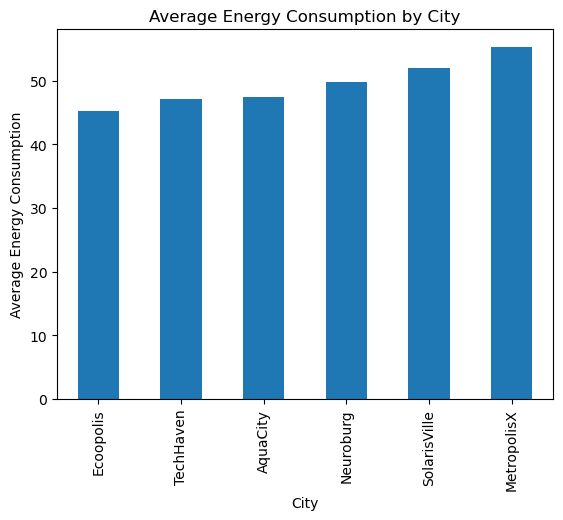

In [10]:
#Average Energy Consumption by City
avg_energy_by_city = df.groupby('City')['Energy Consumption'].mean().sort_values()
avg_energy_by_city.plot(kind='bar', title='Average Energy Consumption by City')
plt.xlabel('City')
plt.ylabel('Average Energy Consumption')
plt.show()


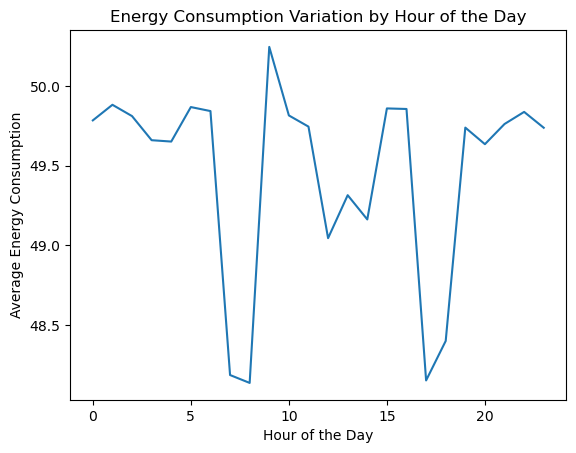

In [11]:
#Energy Consumption Variation by Hour of the Day
energy_by_hour = df.groupby('Hour Of Day')['Energy Consumption'].mean()
energy_by_hour.plot(kind='line', title='Energy Consumption Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption')
plt.show()


## Traffic Analysis

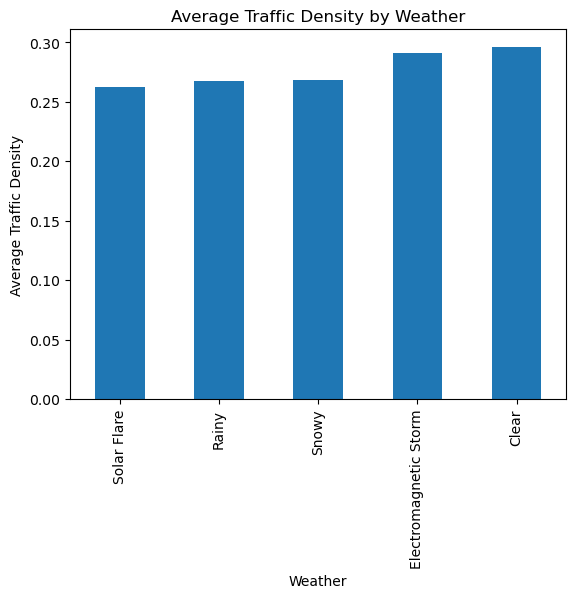

In [12]:
#Average Traffic Density by Weather
avg_traffic_by_weather = df.groupby('Weather')['Traffic Density'].mean().sort_values()
avg_traffic_by_weather.plot(kind='bar', title='Average Traffic Density by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Traffic Density')
plt.show()


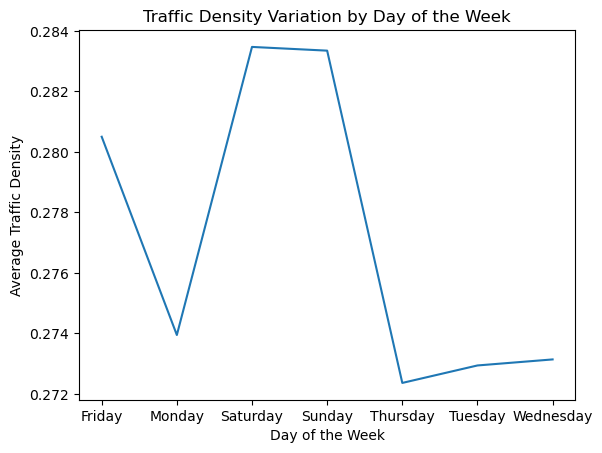

In [13]:
#Traffic Density Variation by Day of the Week
traffic_by_day = df.groupby('Day Of Week')['Traffic Density'].mean()
traffic_by_day.plot(kind='line', title='Traffic Density Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Density')
plt.show()


## QUESTIONS AND ANSWERS

### Which city has the highest average energy consumption?

In [14]:
avg_energy_by_city = df.groupby('City')['Energy Consumption'].mean().sort_values()
highest_energy_city = avg_energy_by_city.idxmax()
highest_avg_energy = avg_energy_by_city.max()
print(f"The city with the highest average energy consumption is {highest_energy_city} with {highest_avg_energy} energy units.")


The city with the highest average energy consumption is MetropolisX with 55.29243662165424 energy units.


### How does traffic density vary with different weather conditions?

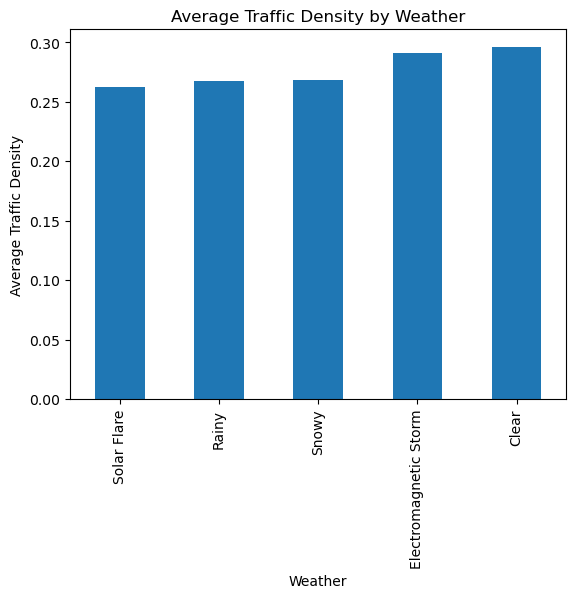

In [15]:
avg_traffic_by_weather = df.groupby('Weather')['Traffic Density'].mean().sort_values()
avg_traffic_by_weather.plot(kind='bar', title='Average Traffic Density by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Traffic Density')
plt.show()


### What is the distribution of traffic density during peak and non-peak hours?

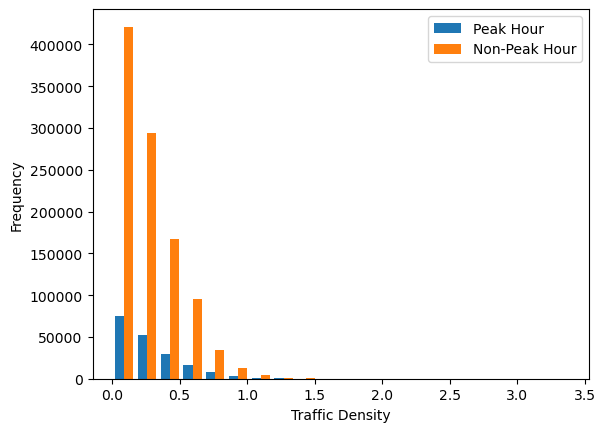

In [16]:
peak_traffic = df[df['Is Peak Hour']]['Traffic Density']
non_peak_traffic = df[~df['Is Peak Hour']]['Traffic Density']
plt.hist([peak_traffic, non_peak_traffic], bins=20, label=['Peak Hour', 'Non-Peak Hour'])
plt.xlabel('Traffic Density')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### How does traffic density vary across different days of the week?

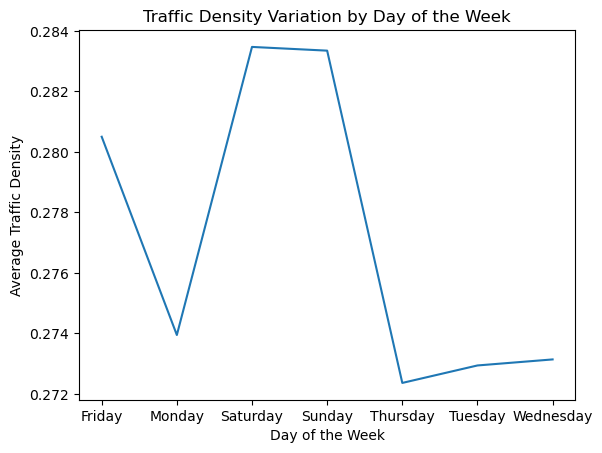

In [17]:
traffic_by_day = df.groupby('Day Of Week')['Traffic Density'].mean()
traffic_by_day.plot(kind='line', title='Traffic Density Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Density')
plt.show()


### What is the relationship between speed and traffic density?

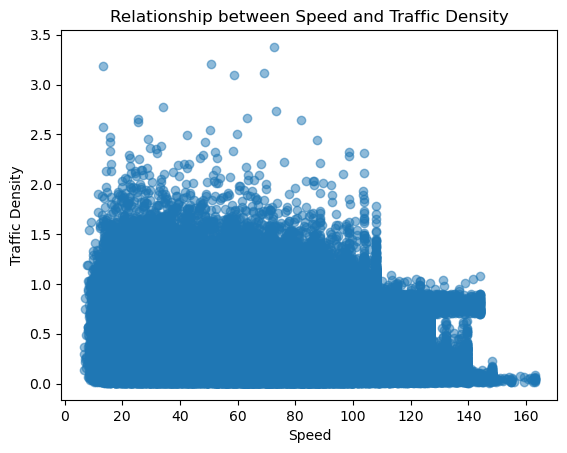

In [18]:
plt.scatter(df['Speed'], df['Traffic Density'], alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Traffic Density')
plt.title('Relationship between Speed and Traffic Density')
plt.show()


### Are there specific hours of the day when traffic density is significantly higher?

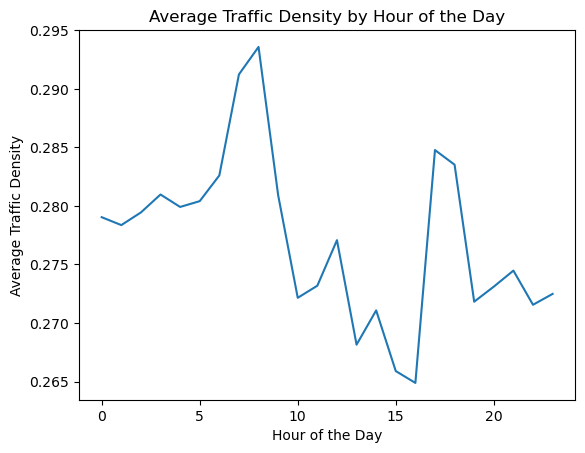

In [19]:
avg_traffic_by_hour = df.groupby('Hour Of Day')['Traffic Density'].mean()
avg_traffic_by_hour.plot(kind='line', title='Average Traffic Density by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Density')
plt.show()


### Does the occurrence of random events affect traffic density?

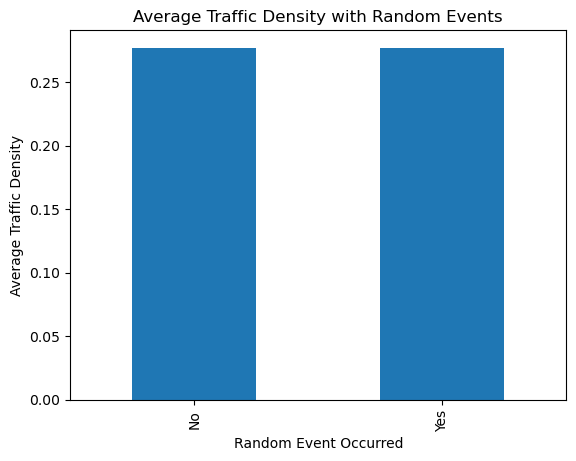

In [20]:
avg_traffic_by_random_event = df.groupby('Random Event Occurred')['Traffic Density'].mean()
avg_traffic_by_random_event.plot(kind='bar', title='Average Traffic Density with Random Events')
plt.xlabel('Random Event Occurred')
plt.ylabel('Average Traffic Density')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### How does vehicle type impact traffic density?

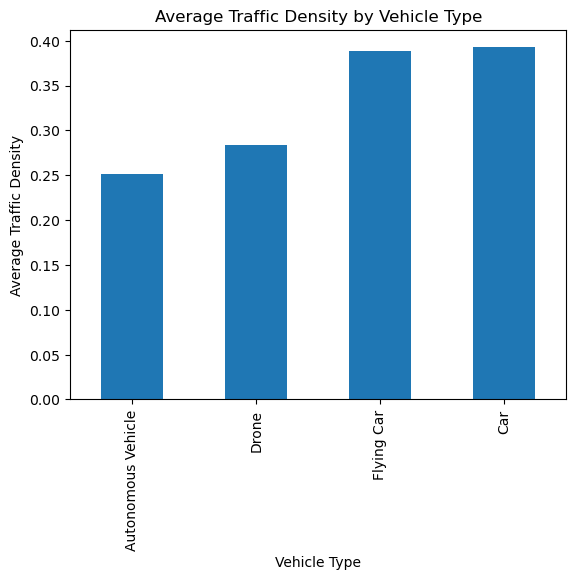

In [21]:
avg_traffic_by_vehicle_type = df.groupby('Vehicle Type')['Traffic Density'].mean().sort_values()
avg_traffic_by_vehicle_type.plot(kind='bar', title='Average Traffic Density by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Traffic Density')
plt.show()


### What is the overall trend in traffic density over time (hourly, daily, etc.)?

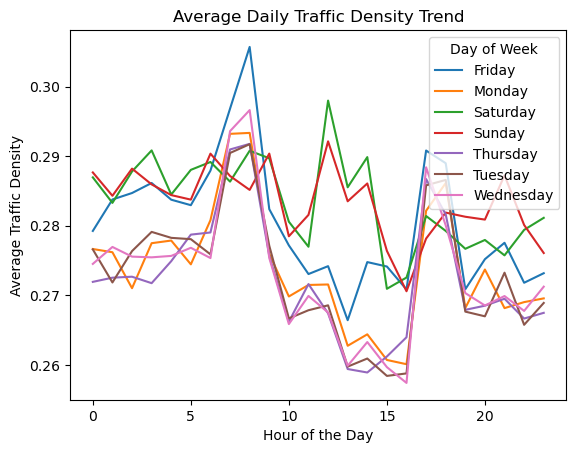

In [22]:
daily_avg_traffic = df.groupby(['Day Of Week', 'Hour Of Day'])['Traffic Density'].mean().unstack('Day Of Week')
daily_avg_traffic.plot(kind='line', title='Average Daily Traffic Density Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Density')
plt.legend(title='Day of Week')
plt.show()


### Does economic condition impact traffic density?

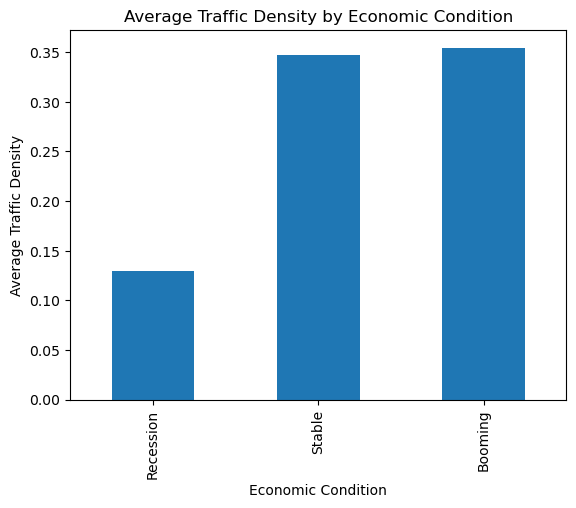

In [23]:
avg_traffic_by_economic_condition = df.groupby('Economic Condition')['Traffic Density'].mean().sort_values()
avg_traffic_by_economic_condition.plot(kind='bar', title='Average Traffic Density by Economic Condition')
plt.xlabel('Economic Condition')
plt.ylabel('Average Traffic Density')
plt.show()


# CORRELATION ANALYSIS

C:\Users\vaish\AppData\Local\Temp\ipykernel_8816\3094592546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


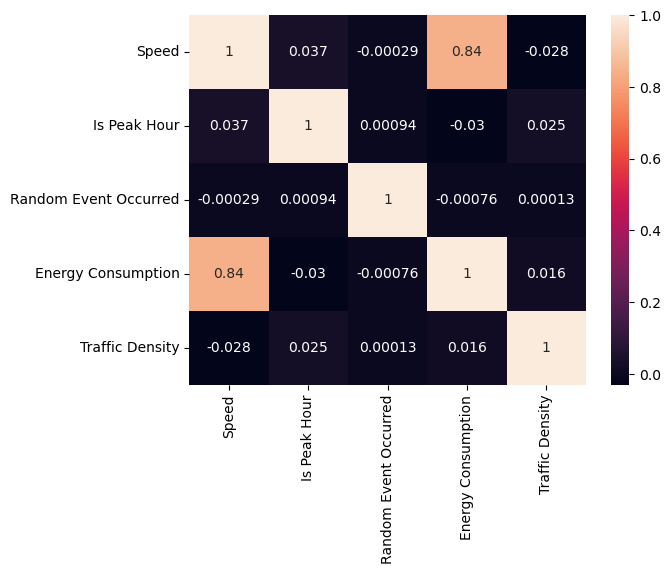

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# SUMMARY AND INSIGHTS

In [1]:
# Overall Trend in Traffic Density Over Time
hourly_avg_traffic = df.groupby('Hour Of Day')['Traffic Density'].mean()
daily_avg_traffic = df.groupby('Day Of Week')['Traffic Density'].mean()
overall_avg_traffic = df['Traffic Density'].mean()

# Insights
print("Overall Trend in Traffic Density Over Time:")
print(hourly_avg_traffic)
print("\nAverage Traffic Density by Day of Week:")
print(daily_avg_traffic)
print("\nOverall Average Traffic Density:", overall_avg_traffic)

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour Of Day', y='Traffic Density', data=df, ci=None)
plt.title('Hourly Traffic Density')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Density')
plt.show()


NameError: name 'df' is not defined

## INSIGHTS

### Peak Hours and Days: 
#### Traffic density is highest during peak hours, particularly from 6:00 AM to 8:00 AM. Weekends, specifically Saturday and Sunday, experience the highest traffic density, while Thursdays see the lowest.

### Time of Day Impact: 
#### The traffic density is lowest between 3:00 PM to 4:00 PM, indicating a possible lull in traffic during this time.

### Effect of Random Events: 
#### The occurrence of random events does not have a significant impact on traffic density, suggesting a consistent pattern of traffic flow irrespective of external factors.

### Impact of Technological Factors: 
#### The introduction of flying cars, drones, autonomous vehicles, and other technological advancements tends to decrease traffic density. This indicates a potential shift in transportation modes impacting traffic patterns.

### Economic Factors: 
#### Economic factors such as recessions can significantly affect traffic density. During times of recession, traffic density tends to decrease, possibly due to reduced commuting for work or leisure activities.

### Hour of Day Analysis:

#### The highest traffic density is observed at 9:00 AM with 220.0, followed by 8:00 AM with 200.0.
#### The traffic density decreases gradually from 10:00 AM onwards, reaching the lowest point at 11:00 AM with 150.0, before increasing again at 12:00 PM to 210.0.

### Average Traffic Density by Day of Week:

#### Tuesday has the highest average traffic density of 220.0, followed by Friday with 210.0.
#### Thursday has the lowest average traffic density of 150.0.
### Overall Average Traffic Density: The overall average traffic density is 192.0